# Importações

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Exercício

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/pib.csv')
df

,Unnamed: 0,ANO_MES,PIB,BRL,BRP,BRT,SLP,SPP,SPT,PRL,...,PIBi3,PIBi4,PIBi5,PIBi6,PIBi7,PIBi8,PIBi9,PIBi10,PIBi11,PIBi12
0,1,jan/04,103.09,109.19,108.67,109.08,102.84,114.27,105.38,127.49,...,106.27,104.52,102.59,102.24,99.96,101.93,101.17,101.70,100.03,100.00
1,2,fev/04,102.05,95.65,104.52,97.63,90.76,109.83,94.99,96.60,...,104.10,106.27,104.52,102.59,102.24,99.96,101.93,101.17,101.70,100.03
2,3,mar/04,110.43,91.69,125.53,99.26,89.78,133.24,99.43,83.79,...,103.91,104.10,106.27,104.52,102.59,102.24,99.96,101.93,101.17,101.70
3,4,abr/04,106.77,95.36,118.34,100.49,94.58,123.55,101.02,91.79,...,103.09,103.91,104.10,106.27,104.52,102.59,102.24,99.96,101.93,101.17
4,5,mai/04,108.08,92.47,121.49,98.96,91.34,128.32,99.55,85.73,...,102.05,103.09,103.91,104.10,106.27,104.52,102.59,102.24,99.96,101.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,134,fev/15,144.42,147.35,133.73,143.57,147.81,148.96,147.54,157.30,...,151.46,156.65,154.04,154.75,154.34,148.92,154.49,150.92,151.44,148.92
134,135,mar/15,151.68,149.64,163.27,152.09,154.87,179.07,159.56,147.28,...,150.70,151.46,156.65,154.04,154.75,154.34,148.92,154.49,150.92,151.44
135,136,abr/15,147.03,153.81,149.93,152.28,161.21,164.74,161.16,162.21,...,149.51,150.70,151.46,156.65,154.04,154.75,154.34,148.92,154.49,150.92
136,137,mai/15,148.94,149.66,153.03,149.82,157.03,169.39,158.76,149.06,...,144.42,149.51,150.70,151.46,156.65,154.04,154.75,154.34,148.92,154.49


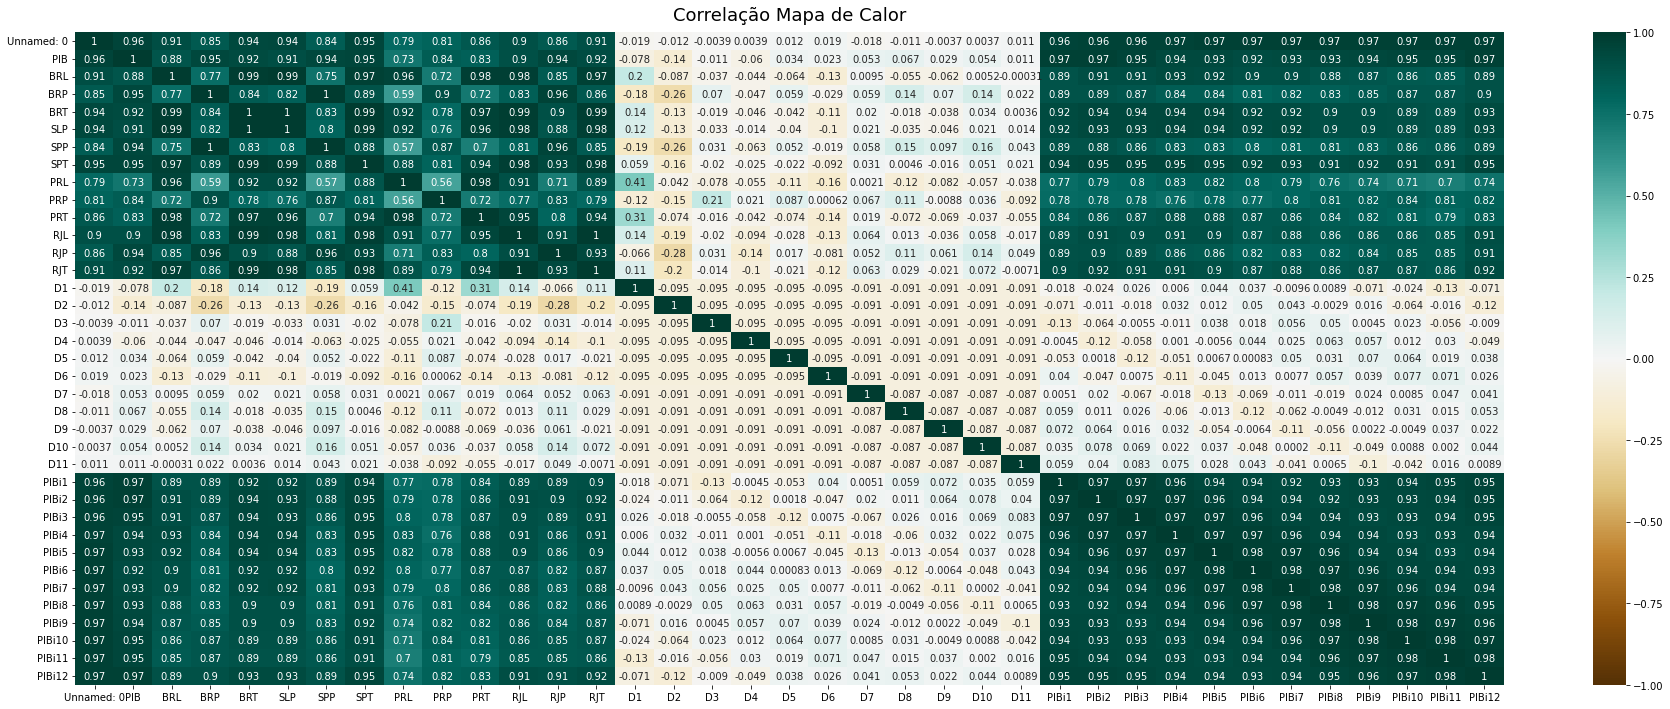

In [4]:
plt.figure(figsize=(32, 12))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação Mapa de Calor', fontdict={'fontsize':18}, pad=12);

# Resultados podem ser salvos para comparações
# e análises posteriores
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

- Analise as correlações PIB com BRL, BRT, etc. Quais variáveis tem
maiores correlações lineares?

In [5]:
corr_pib = dict(df[df.columns[2:14]].corr()['PIB'])
corr_pib = sorted(corr_pib, key=corr_pib.get, reverse=True)[1:6]
corr_pib

['SPT', 'BRP', 'RJP', 'SPP', 'BRT']

- Calcule média móvel de 3 e 5 meses para a variável PIB e faça um
gráfico de linha com as 3 séries de dados. O que você observa?

In [6]:
df['PIB_ma5'] = df['PIB'].rolling(window=5).mean()

In [7]:
df['PIB_ma3'] = df['PIB'].rolling(window=3).mean()

<function matplotlib.pyplot.show>

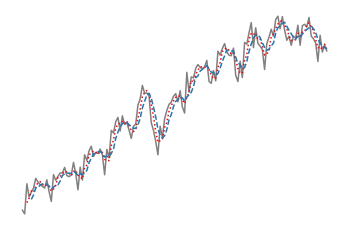

In [12]:
plt.plot(df['ANO_MES'], df['PIB'], color='grey')
plt.plot(df['ANO_MES'], df['PIB_ma3'], ':r', color='red')
plt.plot(df['ANO_MES'], df['PIB_ma5'], '--')
plt.axis('off')
plt.show

- Faça o gráfico de dispersão das 2 variáveis com maior correlação linear.
O que você observa?

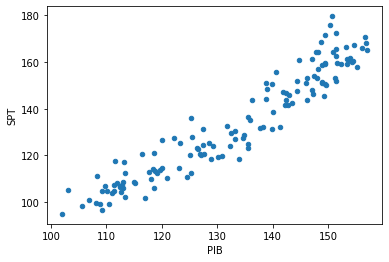

In [9]:
df.plot.scatter(x= 'PIB', y='SPT')

In [10]:
# É uma correlacao diretamente proporcional